#  Investigating Fandango Movie Ratings

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis that discovered that Fandango inflates the ratings under the hood.

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis.

We have ready-made data for both these periods of time:

* Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

* For movies released in 2016 and 2017, the data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd
import numpy as np
# Reading both files:

new_ratings=pd.read_csv('movie_ratings_16_17.csv')
new_ratings.describe()

,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


In [2]:
old_ratings=pd.read_csv('fandango_score_comparison.csv')
old_ratings.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


In [3]:
# Remove extra columns that we won't use:

old_ratings=old_ratings[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
old_ratings.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000
mean,4.089041,3.845205,3848.787671,0.243836
std,0.540386,0.502831,6357.778617,0.152665
min,3.000000,2.700000,35.000000,0.000000
25%,3.500000,3.500000,222.250000,0.100000
50%,4.000000,3.900000,1446.000000,0.200000
75%,4.500000,4.200000,4439.500000,0.400000
max,5.000000,4.800000,34846.000000,0.500000


In [4]:
new_ratings=new_ratings[['movie', 'year', 'fandango']].copy()
new_ratings.describe()

,year,fandango
count,214.000000,214.000000
mean,2016.107477,3.894860
std,0.310444,0.516781
min,2016.000000,2.500000
25%,2016.000000,3.500000
50%,2016.000000,4.000000
75%,2016.000000,4.500000
max,2017.000000,5.000000


Let's try and define the population of interest for our goal (our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis - hence,  we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.)

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

 We have two populations of interest:
* All Fandango's ratings for popular movies released in 2015.
* All Fandango's ratings for popular movies released in 2016.

Old_ratings sample will be our 2015 representative. We can notice that there is no column for year, however year appears in the same patter as penultimate four strings. Let's create new column called `Year` and extract those values

In [5]:
old_ratings['Year'] = old_ratings['FILM'].str[-5:-1]
fandango2015=old_ratings[old_ratings['Year']== '2015'].copy()
fandango2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [6]:
fandango2015.value_counts()

FILM                                                                    Fandango_Stars  Fandango_Ratingvalue  Fandango_votes  Fandango_Difference  Year
Woman in Gold (2015)                                                    4.5             4.4                   2435            0.1                  2015    1
Phoenix (2015)                                                          3.5             3.4                   70              0.1                  2015    1
Home (2015)                                                             4.5             4.4                   7705            0.1                  2015    1
Hot Pursuit (2015)                                                      4.0             3.7                   2618            0.3                  2015    1
Hot Tub Time Machine 2 (2015)                                           3.5             3.0                   1021            0.5                  2015    1
                                                               

New_ratings will be our 2016 representative. we already have Year column, so we only need to extract data for 2016.

In [7]:
fandango2016=new_ratings[new_ratings['year']==2016].copy()
fandango2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [8]:
fandango2016.value_counts()

movie                             year  fandango
Zootopia                          2016  4.5         1
Hell or High Water                2016  4.5         1
In a Valley of Violence           2016  4.0         1
Imperium                          2016  4.5         1
Ice Age: Collision Course         2016  4.0         1
                                                   ..
Resident Evil: The Final Chapter  2016  4.0         1
Race                              2016  4.5         1
Pride and Prejudice and Zombies   2016  4.0         1
Precious Cargo                    2016  3.0         1
10 Cloverfield Lane               2016  3.5         1
Length: 191, dtype: int64

Since 2015 data was collected on all the popular movies, that is movies with more than 30 fans, let's check that this is indeed true, we can also notice that 2016 table doesnt contain this data, so lets see what we can do to make two samples comparable

In [9]:
(fandango2015['Fandango_votes']<30).value_counts()

False    129
Name: Fandango_votes, dtype: int64

All rows are False confirming our theory

## Analyzing two samples

Text(0.5, 0, 'Rating')

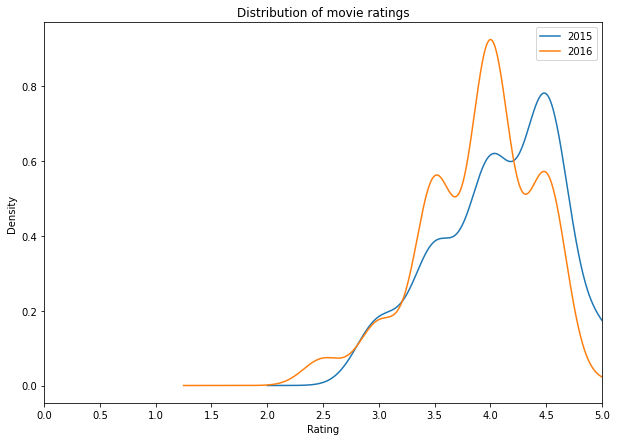

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fandango2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, title='Distribution of movie ratings',
                                        figsize = (10,7),xlabel = 'Rating',
                                        xticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],xlim=[0,5])
fandango2016['fandango'].plot.kde(label = '2016', legend = True, title='Distribution of movie ratings',
                                  figsize = (10,7),xlabel = 'Rating',
                                  xticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],xlim=[0,5])
plt.xlabel('Rating')


The kernel density plots show us that both years are heavily right skewed towards higher ratings, but there is also clear difference between the two years - Movies in 2016 were slightly lower rates than in 2015


Let's examine now frequency distributions of two tables. Clearly, since the number of movies are different and there could be different movies involved, we better normalise our distribution

In [11]:
dist_2015 = (fandango2015['Fandango_Stars'].value_counts(normalize=True)*100).sort_index()
print(dist_2015)

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


In [12]:
dist_2016=(fandango2016['fandango'].value_counts(normalize=True)*100).sort_index()
print(dist_2016)

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


Interesting statistics indeed: we clearly see how ratings lowered in 2016. In 2015 we haven't had anything below 3 starts at all and almost 7% of the movies had rating '5 Stars'. In 2015, only half percent had such high rating.

## Summary Statistics

In [13]:
mean_2015=fandango2015['Fandango_Stars'].mean()
median_2015 = fandango2015['Fandango_Stars'].median()
mode_2015 = fandango2015['Fandango_Stars'].mode()[0]

mean_2016=fandango2016['fandango'].mean()
median_2016 = fandango2016['fandango'].median()
mode_2016 = fandango2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015']=[mean_2015,median_2015,mode_2015]
summary['2016']=[mean_2016,median_2016,mode_2016]

summary.index = ['mean','median','mode']
summary


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


We can conclude that while median is the same, mean rating is higher in 2015 as we expected

Text(0, 0.5, 'Stars')

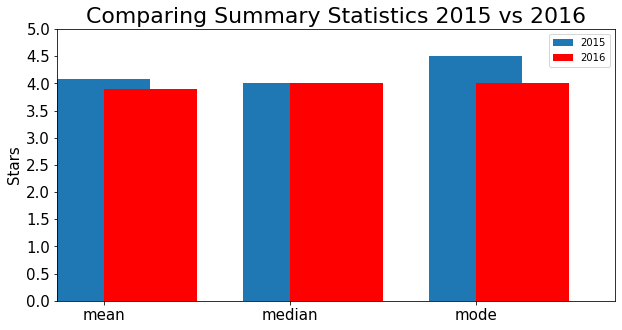

In [14]:
summary['2015'].plot.bar(legend=True,figsize=(10,5),align='center',rot='0',fontsize='15',
                         yticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],ylim=[0,5],)
summary['2016'].plot.bar(legend=True,color='red',figsize=(10,5),align='edge',rot='0',fontsize='15')
plt.title('Comparing Summary Statistics 2015 vs 2016',fontsize='22')
plt.ylabel('Stars',fontsize='15')

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

## Conclusion

Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.